# Logistic Regression

## Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns

## Importing the dataset

In [2]:
dataset = pd.read_csv('breast_cancer.csv')

In [3]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [5]:
dataset.groupby('Class').describe()

Sample code number                                                    \
                   count          mean            std       min        25%   
Class                                                                        
2                  444.0  1.115261e+06  730035.873877  128059.0  1016064.0   
4                  239.0  1.005121e+06  322302.103201   63375.0   832396.5   

                                         Clump Thickness            ...  \
             50%         75%         max           count      mean  ...   
Class                                                               ...   
2      1180677.0  1257845.75  13454352.0           444.0  2.963964  ...   
4      1142706.0  1221955.00   1371026.0           239.0  7.188285  ...   

      Normal Nucleoli       Mitoses                                          \
                  75%   max   count      mean       std  min  25%  50%  75%   
Class                                                                         
2                 1.0   8.0   444.0  1.065315  0.509738  1.0  1.0  1.0  1.0   
4                 9.5  10.0   239.0  2.602510  2.564495  1.0  1.0  1.0  3.0   

             
        max  
Class        
2       8.0  
4      10.0  

[2 rows x 80 columns]

In [6]:
dataset.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
#sns.distplot(a=None, bins=None, hist=True, kde=True, x=None)

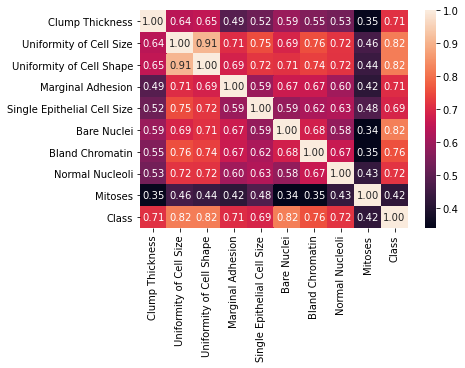

In [8]:
sns.heatmap(dataset.drop('Sample code number', axis= 1).corr(), annot = True, fmt = ".2f")

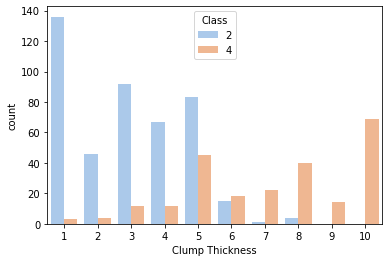

In [9]:
 sns.countplot(data=dataset, x='Clump Thickness', palette="pastel", hue= 'Class')

In [10]:
dataset.groupby('Class').describe()

Sample code number                                                    \
                   count          mean            std       min        25%   
Class                                                                        
2                  444.0  1.115261e+06  730035.873877  128059.0  1016064.0   
4                  239.0  1.005121e+06  322302.103201   63375.0   832396.5   

                                         Clump Thickness            ...  \
             50%         75%         max           count      mean  ...   
Class                                                               ...   
2      1180677.0  1257845.75  13454352.0           444.0  2.963964  ...   
4      1142706.0  1221955.00   1371026.0           239.0  7.188285  ...   

      Normal Nucleoli       Mitoses                                          \
                  75%   max   count      mean       std  min  25%  50%  75%   
Class                                                                         
2                 1.0   8.0   444.0  1.065315  0.509738  1.0  1.0  1.0  1.0   
4                 9.5  10.0   239.0  2.602510  2.564495  1.0  1.0  1.0  3.0   

             
        max  
Class        
2       8.0  
4      10.0  

[2 rows x 80 columns]

In [11]:
X = dataset.iloc[:, 1:-1].values 
y = dataset.iloc[:, -1].values

In [12]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
fs = SelectKBest(score_func=f_classif, k=2)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(683, 2)


## Select Features With RFE (Recursive Feature Elimination)

In [13]:
# report which features were selected by RFE
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
# define RFE
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=6)
# fit RFE
rfe.fit(X, y)
for i in range(X.shape[1]):
    print('Column: %d, Selected=%s, Rank: %d' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected=True, Rank: 1
Column: 1, Selected=True, Rank: 1
Column: 2, Selected=True, Rank: 1
Column: 3, Selected=False, Rank: 2
Column: 4, Selected=True, Rank: 1
Column: 5, Selected=True, Rank: 1
Column: 6, Selected=False, Rank: 3
Column: 7, Selected=True, Rank: 1
Column: 8, Selected=False, Rank: 4


In [14]:
dataset.nunique()  #Columns that have a single observation or value are probably useless for modeling shoeld be removed

Sample code number             630
Clump Thickness                 10
Uniformity of Cell Size         10
Uniformity of Cell Shape        10
Marginal Adhesion               10
Single Epithelial Cell Size     10
Bare Nuclei                     10
Bland Chromatin                 10
Normal Nucleoli                 10
Mitoses                          9
Class                            2
dtype: int64

In [15]:
print(" the number of rows and columns", dataset.shape)
#The rows of duplicated data are identified and removed from the DataFrame.
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

 the number of rows and columns (683, 11)
(675, 11)


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (457, 9) (457,)
Test (226, 9) (226,)


## Training the Logistic Regression model on the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [18]:
y_pred = model.predict(X_test)

## Making the Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[140   4]
 [  5  77]]


## Computing the accuracy with k-Fold Cross Validation

In [20]:
from sklearn.model_selection import cross_val_score
accuracies_train = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)  # 10 is the number of fold -- K-fold
print("Accuracy_Train: {:.2f} %".format(accuracies_train.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_train.std()*100))

Accuracy_Train: 96.73 %
Standard Deviation: 2.23 %


In [21]:
accuracies_test = cross_val_score(estimator = model, X = X_test, y = y_test, cv = 10)
print("Accuracy_Test: {:.2f} %".format(accuracies_test.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_test.std()*100))

Accuracy_Test: 96.88 %
Standard Deviation: 2.88 %


### Model evaluation
- Model is evaluated using 10-fold cross-validation.
- The evaluation procedure is repeated three times.
- The random seed for the cross-validation split is the repeat number (1, 2, or 3).

In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
model = SVC(kernel='sigmoid', gamma='scale', C=0.1)
steps = [('i',SimpleImputer(strategy='median')), ('p',PowerTransformer()), ('m',model)]
pipeline = Pipeline(steps=steps)
m_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Good: %.3f (%.3f)' % (np.mean(m_scores)*100, np.std(m_scores)*100))

Good: 97.462 (1.689)


### Model Built Using Chi-Squared Features:
We can use the chi-squared test to score the features and select the four most relevant features.

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k=4) 
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
 
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs
# feature selection
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train)
# evaluate the model
y_pred = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 95.58


### Model Built Using Mutual Information Features:
We can repeat the experiment and select the top four features using a mutual information statistic.

In [24]:
# evaluation of a model fit using mutual information input features
from sklearn.feature_selection import mutual_info_classif
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k=4)
	fs.fit(X_train, y_train)
	X_train_mic = fs.transform(X_train)
	X_test_mic = fs.transform(X_test)
	return X_train_fs, X_test_fs
X_train_mic, X_test_mic = select_features(X_train, y_train, X_test)
# fit the model
model.fit(X_train_mic, y_train)
# evaluate the model
y_pred_mic = model.predict(X_test_mic)
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred_mic)
print('Accuracy_mic: %.2f' % (accuracy*100))

Accuracy_mic: 95.58
